In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install ml_metrics
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import neighbors
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.model_selection import KFold, cross_val_score
import ml_metrics as metrics

import operator

import warnings
warnings.filterwarnings('ignore')

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for ml_metrics: filename=ml_metrics-0.1.4-py3-none-any.whl size=7849 sha256=9524978149a191983d1d65b0a148a9e6bc1dada84adfa976d7252ec3661dbb09
  Stored in directory: c:\users\kalya\appdata\local\pip\cache\wheels\09\2d\e7\58a96e635aedc543a3a78ff855dc9911d98fc1640e3921c823
Successfully built ml_metrics


In [3]:
df = pd.read_csv('Heart_Disease_Prediction.csv')
df.shape

(270, 14)

In [4]:
df.head(3)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence


In [5]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [6]:
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [7]:
df.cvd.value_counts() # df.target.unique()

AttributeError: 'DataFrame' object has no attribute 'cvd'

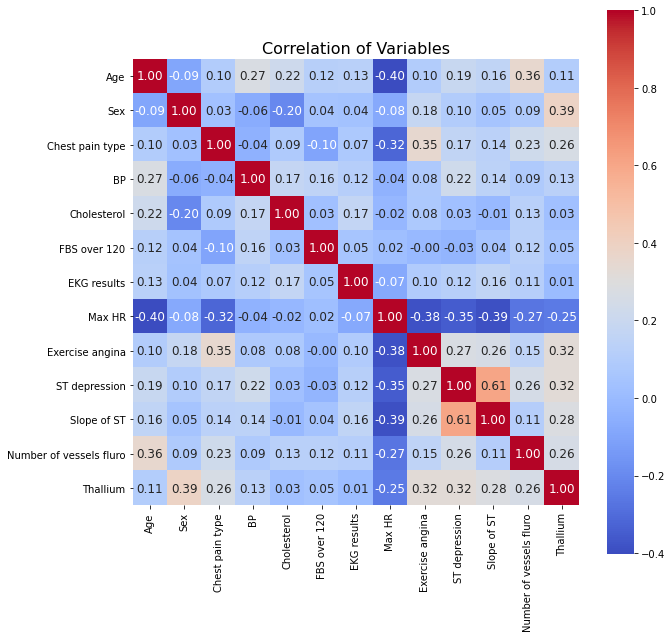

In [8]:
corr = df.corr()
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, square=True, ax=ax, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size':12})
plt.title('Correlation of Variables', size=16)
plt.show()

In [8]:
#set variables for EDA
disease = len(df[df['cvd'] == 1])
no_disease = len(df[df['cvd']== 0])
y = ('Heart Disease', 'No Disease')
y_pos = np.arange(len(y))
x = (disease, no_disease)

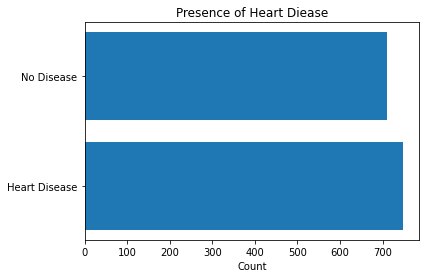

In [9]:
fig, ax = plt.subplots()
ax.barh(y_pos, x, align='center')
ax.set_yticklabels(y)
ax.set_yticks(y_pos)
ax.set_xlabel('Count')
ax.set_title('Presence of Heart Diease')
plt.show()

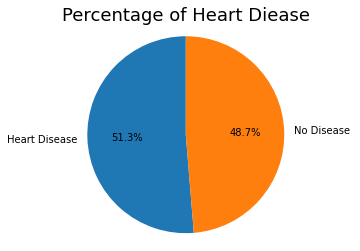

In [10]:
labels = 'Heart Disease', 'No Disease'
sizes = [disease, no_disease]
fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%', startangle=90) 
ax1.axis('equal')
plt.title('Percentage of Heart Diease', size=18)
plt.show()

In [11]:
#define each type of varaible
qualitative = []
quantitative = []
for feature in df.columns:
    if len(df[feature].unique()) <= 8:
        qualitative.append(feature)
    else:
        quantitative.append(feature)

In [12]:
qualitative

['sex', 'fasting.blood.sugar', 'exercise.angina', 'chest.pain.type', 'cvd']

In [13]:
quantitative

['cholesterol', 'max.heart.rate', 'ST.depression']

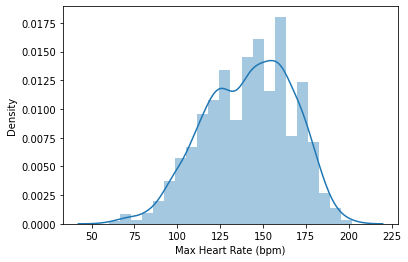

In [14]:
sns.distplot(df['max.heart.rate']) # histogram distribution
plt.xlabel('Max Heart Rate (bpm)')
plt.show()

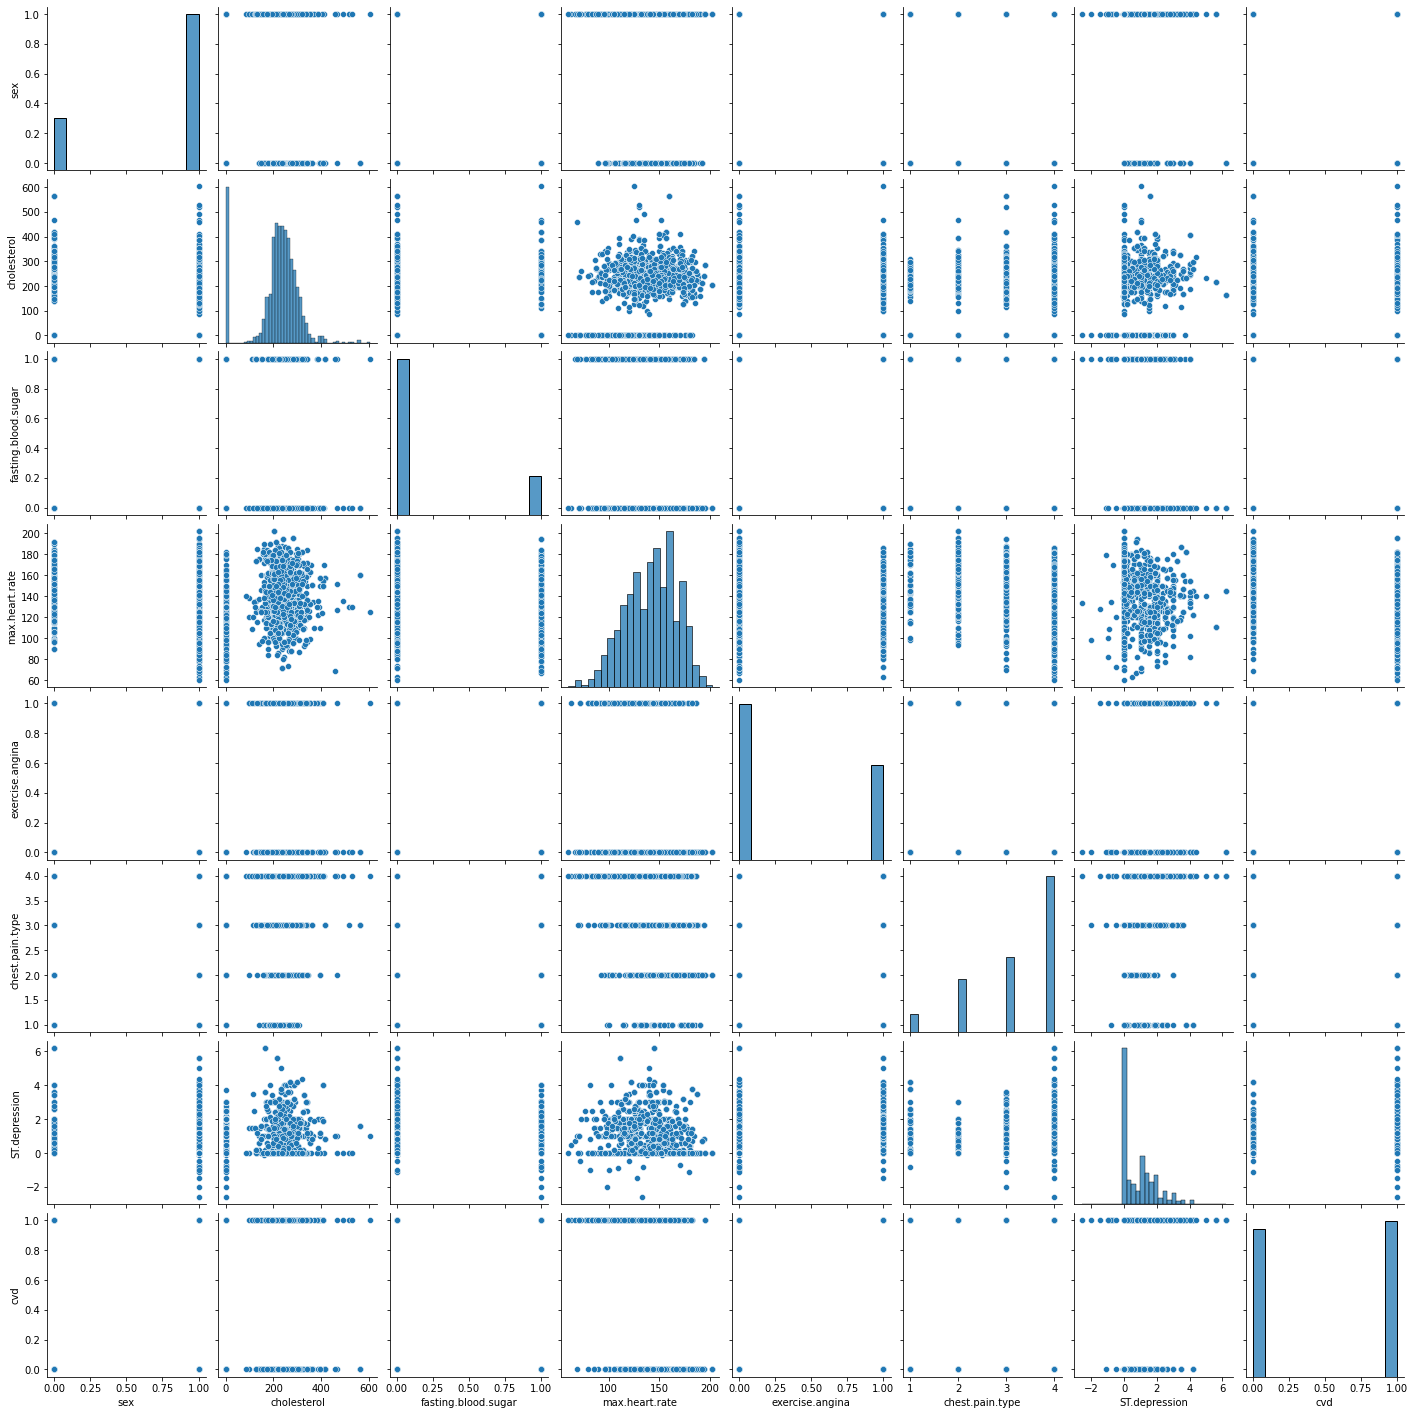

In [15]:
sns.pairplot(df)
plt.show()

In [16]:
X = df.drop('cvd',1)
y = df['cvd']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Logistic Regression

In [17]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
Y_pred = model.predict(X_test)
lr_score = model.score(X_test, y_test)
#accuracy, recall, and precision
print(f"Accuracy: {round(accuracy_score(y_test, Y_pred) * 100, 2)}%")
print(f"Precision: {round(precision_score(y_test, Y_pred, average='macro') * 100, 2)}%")
print(f"Recall: {round(recall_score(y_test, Y_pred, average='macro') * 100, 2)}%")

Accuracy: 85.62%
Precision: 85.63%
Recall: 85.63%


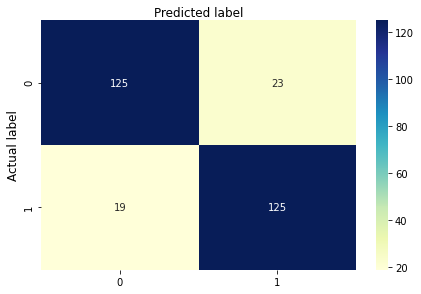

In [18]:
cnf_matrix = confusion_matrix(y_test, Y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()

plt.ylabel('Actual label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)
plt.rcParams.update({'font.size': 15})

# Decision Tree Classifier

In [19]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
Y_pred = dtc.predict(X_test)
dtc_score = dtc.score(X_test, y_test)
print(f"Accuracy: {round(accuracy_score(y_test, Y_pred) * 100, 2)}%")
print(f"Precision: {round(precision_score(y_test, Y_pred, average='macro') * 100, 2)}%")
print(f"Recall: {round(recall_score(y_test, Y_pred, average='macro') * 100, 2)}%")

Accuracy: 88.7%
Precision: 88.8%
Recall: 88.66%


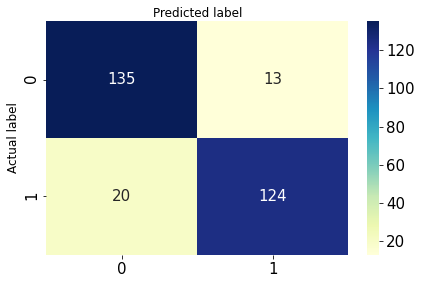

In [20]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, Y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()

plt.ylabel('Actual label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)
plt.rcParams.update({'font.size': 15})

# Random Forest Classifier

In [21]:
rfc = RandomForestClassifier(n_estimators = 250)
rfc.fit(X_train, y_train)
Y_pred = rfc.predict(X_test)
rfc_score = rfc.score(X_test, y_test)
print(f"Accuracy: {round(accuracy_score(y_test, Y_pred) * 100, 2)}%")
print(f"Precision: {round(precision_score(y_test, Y_pred, average='macro') * 100, 2)}%")
print(f"Recall: {round(recall_score(y_test, Y_pred, average='macro') * 100, 2)}%")

Accuracy: 94.18%
Precision: 94.18%
Recall: 94.18%


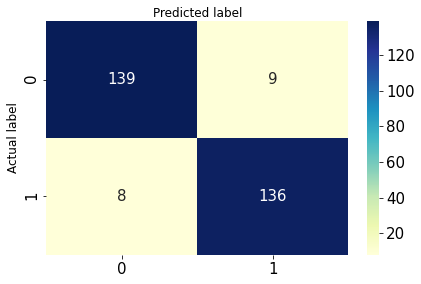

In [22]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, Y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()

plt.ylabel('Actual label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)
plt.rcParams.update({'font.size': 15})

# KNeighborsClassifier

In [23]:
knn = neighbors.KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
knn_score = knn.score(X_test, y_test)
print(f"Accuracy: {round(accuracy_score(y_test, Y_pred) * 100, 2)}%")
print(f"Precision: {round(precision_score(y_test, Y_pred, average='macro') * 100, 2)}%")
print(f"Recall: {round(recall_score(y_test, Y_pred, average='macro') * 100, 2)}%")

Accuracy: 72.26%
Precision: 72.39%
Recall: 72.31%


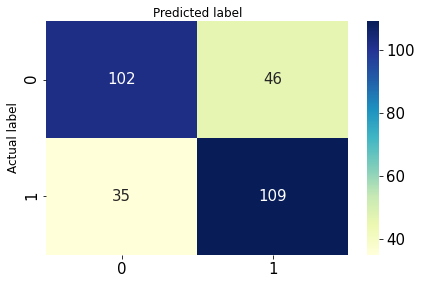

In [24]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, Y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()

plt.ylabel('Actual label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)
plt.rcParams.update({'font.size': 15})

# Naives Bayes

In [25]:
nb = GaussianNB()
nb.fit(X_train, y_train)
Y_pred = nb.predict(X_test)
nb_score = nb.score(X_test, y_test)
print(f"Accuracy: {round(accuracy_score(y_test, Y_pred) * 100, 2)}%")
print(f"Precision: {round(precision_score(y_test, Y_pred, average='macro') * 100, 2)}%")
print(f"Recall: {round(recall_score(y_test, Y_pred, average='macro') * 100, 2)}%")

Accuracy: 82.53%
Precision: 82.55%
Recall: 82.52%


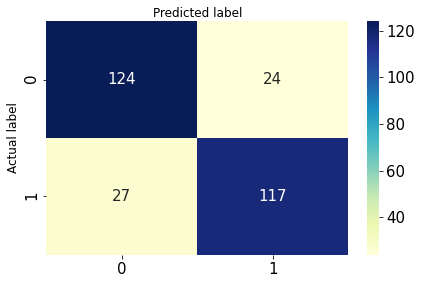

In [26]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, Y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()

plt.ylabel('Actual label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)
plt.rcParams.update({'font.size': 15})

# Evaluation of Individual Models

In [27]:
def model_val(X, y, classifier, scor, show):
  X = np.array(X)
  y = np.array(y)

  scores = cross_val_score(classifier, X, y, scoring=scor)

  if show == True:
    print("Score: {:.2f} (+/- {:.2f})".format(scores.mean(), scores.std()))
  
  return scores.mean()

In [28]:
# List of models
rfc = RandomForestClassifier()
ctc = DecisionTreeClassifier()
lr = LogisticRegression()
nb = GaussianNB()
knn = neighbors.KNeighborsClassifier()

model = []
score = []

# Check model score
for classifier in (rfc, ctc, lr, nb, knn):
    model.append(classifier.__class__.__name__)
    score.append(model_val(X_train, y_train, classifier, scor='roc_auc', show=True))

pd.DataFrame(data=score, index=model, columns=['roc_auc'])

Score: 0.95 (+/- 0.01)
Score: 0.86 (+/- 0.02)
Score: 0.88 (+/- 0.02)
Score: 0.87 (+/- 0.02)
Score: 0.81 (+/- 0.02)


,roc_auc
RandomForestClassifier,0.949641
DecisionTreeClassifier,0.861700
LogisticRegression,0.879027
GaussianNB,0.874893
KNeighborsClassifier,0.805284


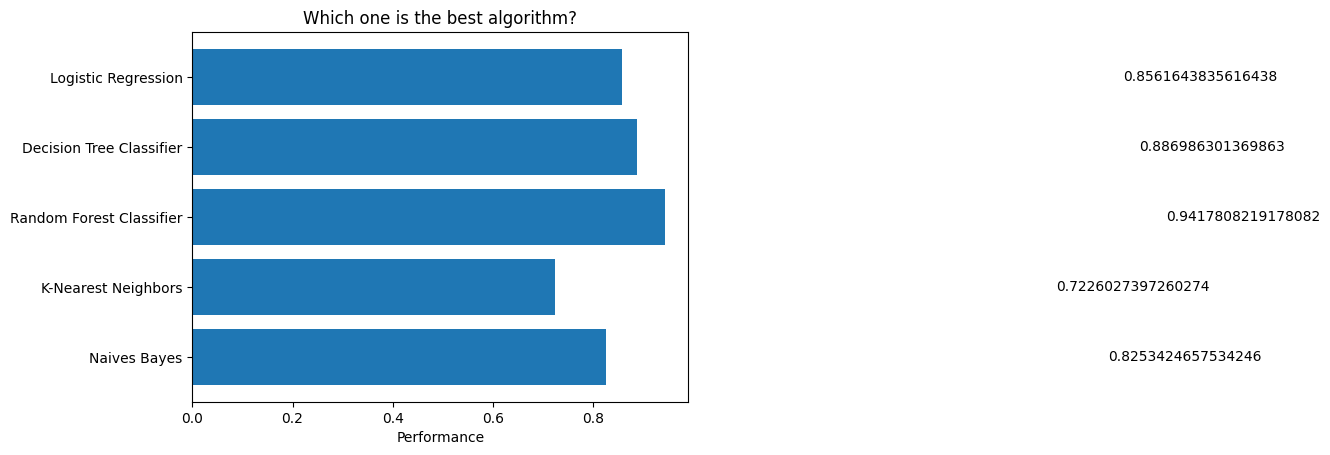

In [29]:
plt.rcdefaults()
fig, ax = plt.subplots()
algorithms = ('Logistic Regression', 
              'Decision Tree Classifier', 
              'Random Forest Classifier',  
              'K-Nearest Neighbors', 
              'Naives Bayes')
y_pos = np.arange(len(algorithms))
x = (lr_score, dtc_score, rfc_score, knn_score, nb_score) # scores
ax.barh(y_pos, x, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(algorithms)
ax.invert_yaxis() # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('Which one is the best algorithm?')
for i, v in enumerate(x):
    ax.text(v + 1, i, str(v), color='black', va='center', fontweight='normal')
plt.show()

# Ensemble Method and Evaluation

In [45]:
model1 = LogisticRegression(random_state=1)
model2 = DecisionTreeClassifier(random_state=1)
model3 = RandomForestClassifier(random_state=1)
model = VotingClassifier(estimators=[('lr', model1), ('dt', model2), ('rf', model3)], voting='hard')
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.928082191780822

In [46]:
Y_pred = model.predict(X_test)
ensemble_score = model.score(X_test, y_test)
print(f"Accuracy: {round(accuracy_score(y_test, Y_pred) * 100, 2)}%")
print(f"Precision: {round(precision_score(y_test, Y_pred, average='macro') * 100, 2)}%")
print(f"Recall: {round(recall_score(y_test, Y_pred, average='macro') * 100, 2)}%")

Accuracy: 92.81%
Precision: 92.81%
Recall: 92.82%


In [52]:
model1.fit(X_train,y_train)
model1_score = model1.score(X_test, y_test)

In [53]:
model2.fit(X_train,y_train)
model2_score = model2.score(X_test, y_test)

In [54]:
model3.fit(X_train,y_train)
model3_score = model3.score(X_test, y_test)

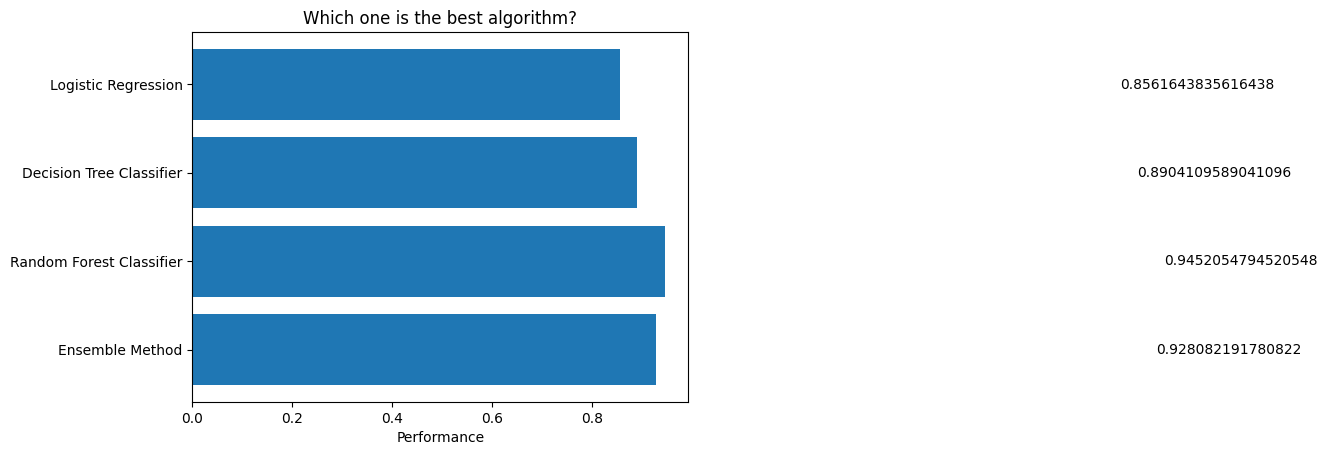

In [55]:
plt.rcdefaults()
fig, ax = plt.subplots()
algorithms = ('Logistic Regression', 
              'Decision Tree Classifier', 
              'Random Forest Classifier',  
              'Ensemble Method')
y_pos = np.arange(len(algorithms))
x = (model1_score, model2_score, model3_score, ensemble_score) # scores
ax.barh(y_pos, x, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(algorithms)
ax.invert_yaxis() # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('Which one is the best algorithm?')
for i, v in enumerate(x):
    ax.text(v + 1, i, str(v), color='black', va='center', fontweight='normal')
plt.show()